## 2021/01/28 データ修正後

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv("TumorAndNormal3_modified.csv")

In [24]:
df

,Name,Positive_rate,Hscore
0,AppocrineGland,0.389105,0.389105
1,EccrineGland,70.588235,152.941176
2,EccrineGland,92.857143,250.000000
3,EccrineDuct,97.500000,230.000000
4,Sebaceous gland+duct,32.758621,34.482759
...,...,...,...
251,Squamous cell carcinoma,0.000000,0.000000
252,Squamous cell carcinoma,91.100000,194.000000
253,Squamous cell carcinoma,3.700000,4.000000
254,Benign sweat gland tumor,84.700000,175.000000


In [25]:
df.Name.value_counts()

Basal cell carcinoma                               26
Squamous cell carcinoma                            25
Sebaceous gland+duct                               21
Poroma                                             20
Sebaceous carcinoma                                15
OuterRootSheath                                    15
EccrineGland                                       12
Porocarcinoma                                      12
Apocrine adenocarcinoma                            12
Benign sweat gland tumor                           11
EccrineDuct                                        10
Pilomatrixoma                                      10
Trichoblastoma, Trichilemmal cyst, Trihilemmoma     8
Sebaceous adenoma                                   7
Follicular cyst, infundibular type                  7
AppocrineGland                                      6
HairBulb                                            5
Microcystic adnexal carcinoma                       5
Mucinous carcinoma          

In [26]:
df[df.Name=="Squamous cell carcinoma"].Positive_rate.mean()

26.672000000000004

In [27]:
df[df.Name=="Squamous cell carcinoma"].Positive_rate.mean()

26.672000000000004

In [28]:
List = df.Name.unique()

In [29]:
List

array(['AppocrineGland', 'EccrineGland', 'EccrineDuct',
       'Sebaceous gland+duct', 'OuterRootSheath', 'HairBulb',
       'Malignant Sweat gland tumors, miscellaneous',
       'Apocrine adenocarcinoma', 'Benign sweat gland tumor',
       'Extramammary Paget’s disease', 'Basal cell carcinoma',
       'Inverted follicular keratosis',
       'Follicular cyst, infundibular type',
       'Trichoblastoma, Trichilemmal cyst, Trihilemmoma',
       'Hidradenocarcinoma', 'Microcystic adnexal carcinoma',
       'Mucinous carcinoma', 'Pilomatrixoma', 'Porocarcinoma', 'Poroma',
       'Proliferating trichilemmal tumor', 'Sebaceous adenoma',
       'Sebaceous carcinoma', 'Spiradenocarcinoma',
       'Squamous cell carcinoma'], dtype=object)

In [30]:
Positive_rate_mean = []
for i in List:
    df_each = df[df.Name == i]
    positive_rate_mean = df_each.Positive_rate.mean()
    Positive_rate_mean.append(positive_rate_mean)

In [31]:
Hscore_mean_List = []
for i in List:
    df_each = df[df.Name == i]
    Hscore_mean = df_each.Hscore.mean()
    Hscore_mean_List.append(Hscore_mean)

In [32]:
import numpy as np

In [33]:
df_mean = pd.DataFrame({"Positive %":Positive_rate_mean, "H-score":Hscore_mean_List})

In [34]:
df_mean["Name"] = List

In [35]:
df_mean.set_index("Name", inplace=True)

In [36]:
df_mean.sort_values(by="Positive %")

,Positive %,H-score
Name,,
HairBulb,0.062696,0.062696
"Follicular cyst, infundibular type",12.585714,20.571429
AppocrineGland,13.651876,14.004796
Squamous cell carcinoma,26.672000,46.920000
Pilomatrixoma,28.140000,42.900000
Mucinous carcinoma,31.260000,32.600000
Apocrine adenocarcinoma,34.741667,54.916667
Inverted follicular keratosis,46.950000,69.750000
Hidradenocarcinoma,57.500000,122.250000


In [38]:
df_mean.to_csv("NormalAndTumor_mean_PositiveRate_Hscore.csv")

In [39]:
Scaler = StandardScaler()
df_mean_scaled = Scaler.fit_transform(df_mean)

In [40]:
df_mean[["PositiveRatioScaled", "HscoreScaled"]] = df_mean_scaled

In [44]:
df_mean[["PositiveRatioScaled", "HscoreScaled"]].to_csv("NormalAndTumor_scaled.csv")

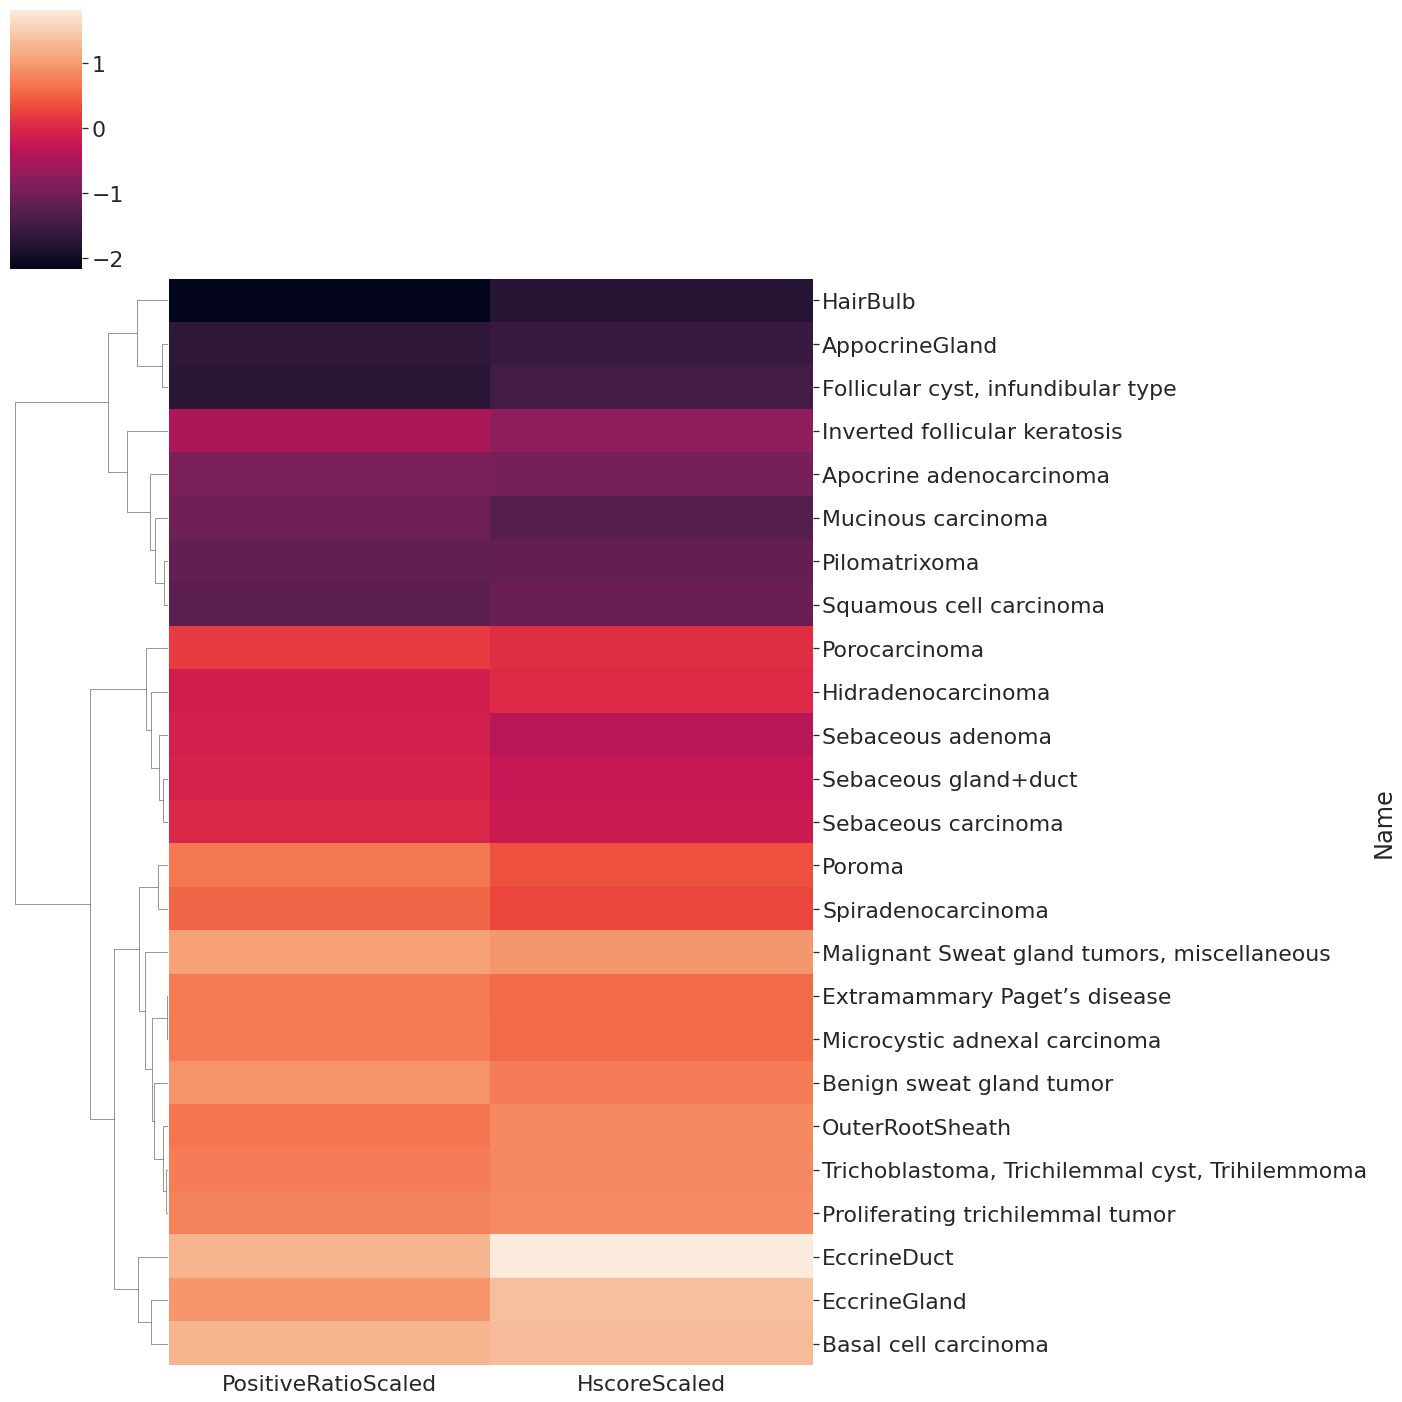

In [21]:
sns.set(font_scale = 2)

sns.clustermap(df_mean[["PositiveRatioScaled", "HscoreScaled"]], figsize=(20, 20), col_cluster=False, metric = "euclidean")
#plt.tight_layout()
#plt.ylabel("")
#plt.savefig("Hierarchical_clustering_by_mean.png")

In [21]:
df_mean.columns

Index(['Positive %', 'H-score', 'PositiveRatioScaled', 'HscoreScaled'], dtype='object')

<AxesSubplot:xlabel='PositiveRatioScaled', ylabel='HscoreScaled'>

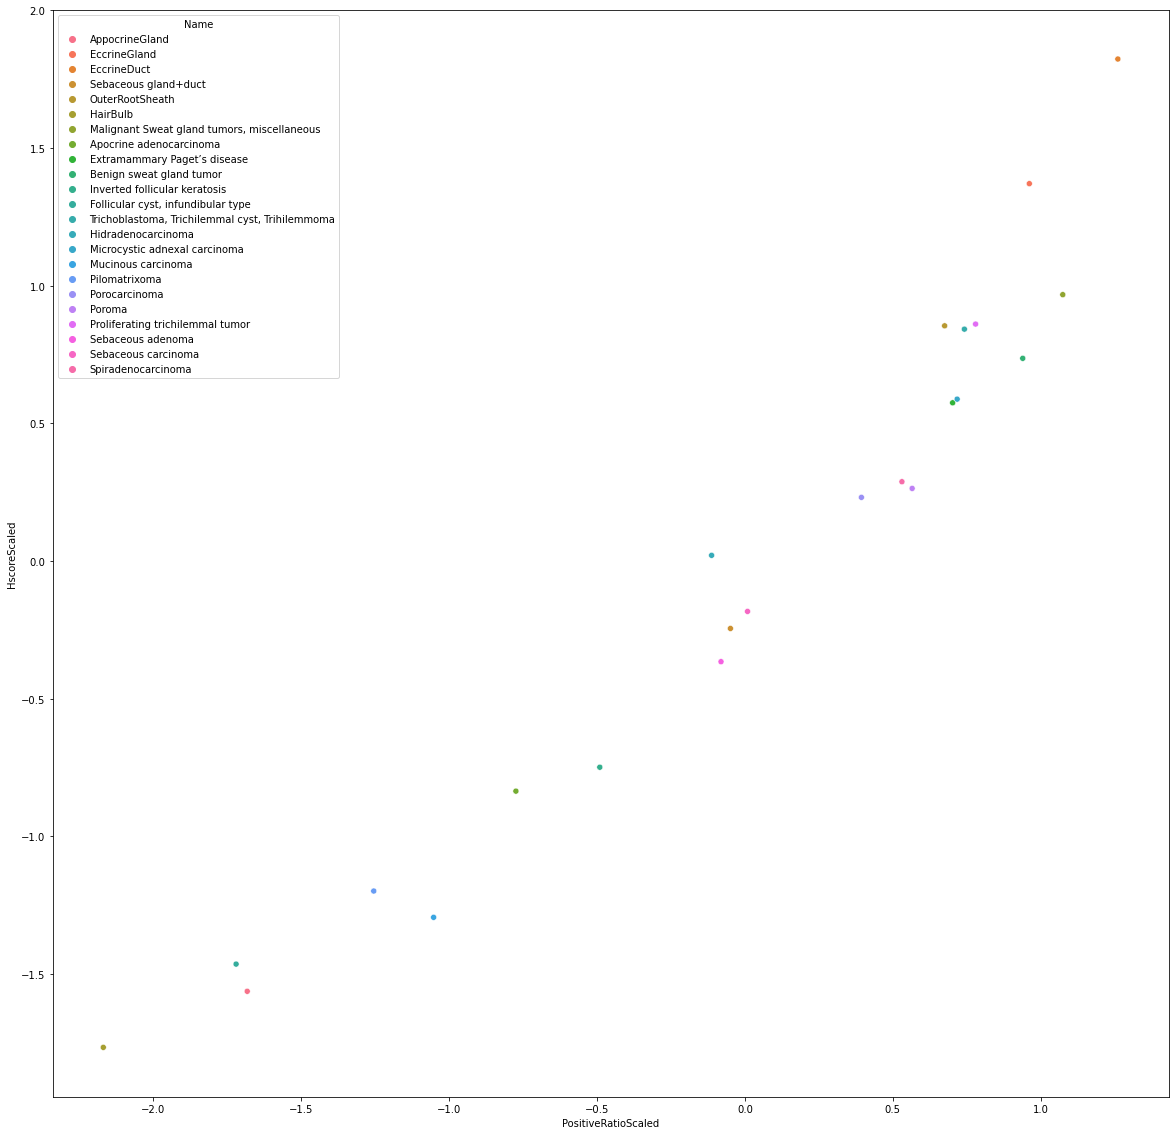

In [24]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=df_mean["PositiveRatioScaled"], y=df_mean["HscoreScaled"], hue=df_mean.index)

In [25]:
from sklearn.cluster import KMeans

In [26]:
classifier_kmeans = KMeans(n_clusters=3)

In [38]:
df_mean.columns

Index(['Positive %', 'H-score', 'PositiveRatioScaled', 'HscoreScaled'], dtype='object')

In [39]:
classifier_kmeans.fit(df_mean[['PositiveRatioScaled', 'HscoreScaled']])

KMeans(n_clusters=3)

In [42]:
cluster_number = classifier_kmeans.predict(df_mean[['PositiveRatioScaled', 'HscoreScaled']])

In [43]:
cluster_number

array([0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2,
       1], dtype=int32)

In [44]:
df_mean["Cluster"] = cluster_number

<AxesSubplot:xlabel='PositiveRatioScaled', ylabel='HscoreScaled'>

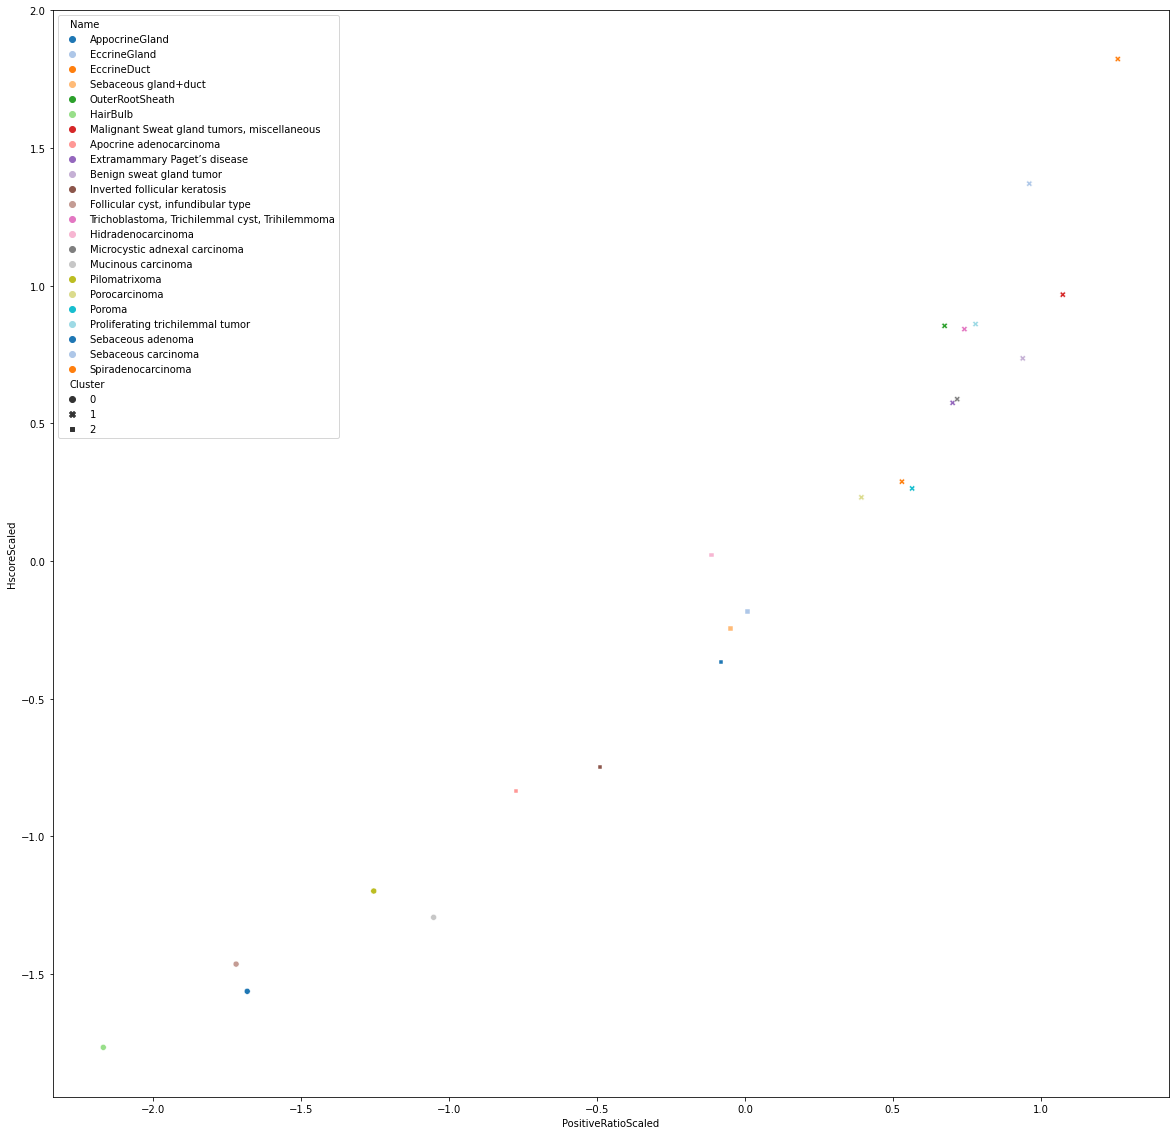

In [50]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=df_mean["PositiveRatioScaled"], y=df_mean["HscoreScaled"], hue=df_mean.index, palette="tab20", style=df_mean.Cluster)

In [49]:
df_mean.sort_values(by="Cluster")

,Positive %,H-score,PositiveRatioScaled,HscoreScaled,Cluster
Name,,,,,
AppocrineGland,13.651876,14.004796,-1.682042,-1.563077,0
Pilomatrixoma,25.595231,38.941226,-1.254532,-1.198845,0
Mucinous carcinoma,31.249238,32.398741,-1.052148,-1.294407,0
HairBulb,0.062696,0.062696,-2.168463,-1.766720,0
"Follicular cyst, infundibular type",12.600817,20.773311,-1.719664,-1.464213,0
Spiradenocarcinoma,75.466184,140.723832,0.530589,0.287831,1
"Malignant Sweat gland tumors, miscellaneous",90.653002,187.233531,1.074198,0.967170,1
Extramammary Paget’s disease,80.253071,160.338680,0.701934,0.574333,1
Benign sweat gland tumor,86.873249,171.393312,0.938902,0.735802,1


In [51]:
from sklearn.mixture import GaussianMixture

In [53]:
Classifier_GMM = GaussianMixture(n_components=3)
cluster_number_GMM = Classifier_GMM.fit_predict(df_mean[['PositiveRatioScaled', 'HscoreScaled']])
df_mean["Cluster_GMM"] = cluster_number_GMM

In [54]:
df_mean.sort_values(by="Cluster_GMM")

,Positive %,H-score,PositiveRatioScaled,HscoreScaled,Cluster,Cluster_GMM
Name,,,,,,
Benign sweat gland tumor,86.873249,171.393312,0.938902,0.735802,1,0
Mucinous carcinoma,31.249238,32.398741,-1.052148,-1.294407,0,0
Sebaceous gland+duct,59.273666,104.226376,-0.049019,-0.245265,2,0
Sebaceous adenoma,58.385183,95.975542,-0.080822,-0.365780,2,0
"Malignant Sweat gland tumors, miscellaneous",90.653002,187.233531,1.074198,0.967170,1,0
Apocrine adenocarcinoma,39.018615,63.779724,-0.774044,-0.836045,2,0
Hidradenocarcinoma,57.495348,122.410892,-0.112674,0.020345,2,0
Porocarcinoma,71.641804,136.826698,0.393696,0.230908,1,0
Inverted follicular keratosis,46.939478,69.724230,-0.490519,-0.749217,2,0


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
Scaler2 = MinMaxScaler()

In [90]:
df_mean_scaled2 = Scaler2.fit_transform(df_mean[['Positive %', 'H-score']])

In [91]:
df_mean_scaled2

array([[0.0956802 , 0.04098056],
       [0.90332682, 0.86448216],
       [1.        , 0.9648604 ],
       [0.33674773, 0.1392365 ],
       [0.99291442, 1.        ],
       [0.69673301, 0.39481284],
       [0.        , 0.        ],
       [0.78871085, 0.64992363],
       [0.66738282, 0.34354153],
       [0.96915794, 0.77268545],
       [0.05341962, 0.02098325],
       [0.90892208, 0.72744711],
       [0.9170926 , 0.67404016],
       [0.56620427, 0.2579881 ],
       [0.01794456, 0.01006947],
       [0.81365808, 0.6991943 ],
       [0.67255766, 0.44002736],
       [0.86308495, 0.62286968],
       [0.2167821 , 0.08515212],
       [0.03906418, 0.01534443],
       [0.85927355, 0.46174907],
       [0.87008122, 0.59841712],
       [0.81347438, 0.60637334],
       [0.52843735, 0.30726787],
       [0.67335806, 0.33091191],
       [0.84482285, 0.63273255]])

In [92]:
df_mean[["PositiveRatioScaledMinMax", "HscoreScaledMinMax"]] = df_mean_scaled2

In [93]:
df_mean

,Positive %,H-score,PositiveRatioSclaed,HscoreScaled,PositiveRatioScaled,PositiveRatioScaledMinMax,HscoreScaledMinMax
Name,,,,,,,
AppocrineGland,9.307714,10.149083,-1.489641,-1.292688,-1.489641,0.095680,0.040981
EccrineGland,87.875101,214.094213,0.830673,1.322226,0.830673,0.903327,0.864482
EccrineDuct,97.279412,238.953488,1.108409,1.640963,1.108409,1.000000,0.964860
SG_germinativelayer,32.758621,34.482759,-0.797070,-0.980690,-0.797070,0.336748,0.139237
OuterRootSheath,96.590131,247.656022,1.088053,1.752543,1.088053,0.992914,1.000000
OuterRootSheath_isthmus,67.777778,97.777778,0.237143,-0.169143,0.237143,0.696733,0.394813
HairBulb,0.000000,0.000000,-1.764524,-1.422816,-1.764524,0.000000,0.000000
Sebocyte,76.725328,160.957501,0.501389,0.640925,0.501389,0.788711,0.649924
SebaceousDuct,64.922608,85.080128,0.152822,-0.331948,0.152822,0.667383,0.343542


<AxesSubplot:xlabel='PositiveRatioScaledMinMax', ylabel='HscoreScaledMinMax'>

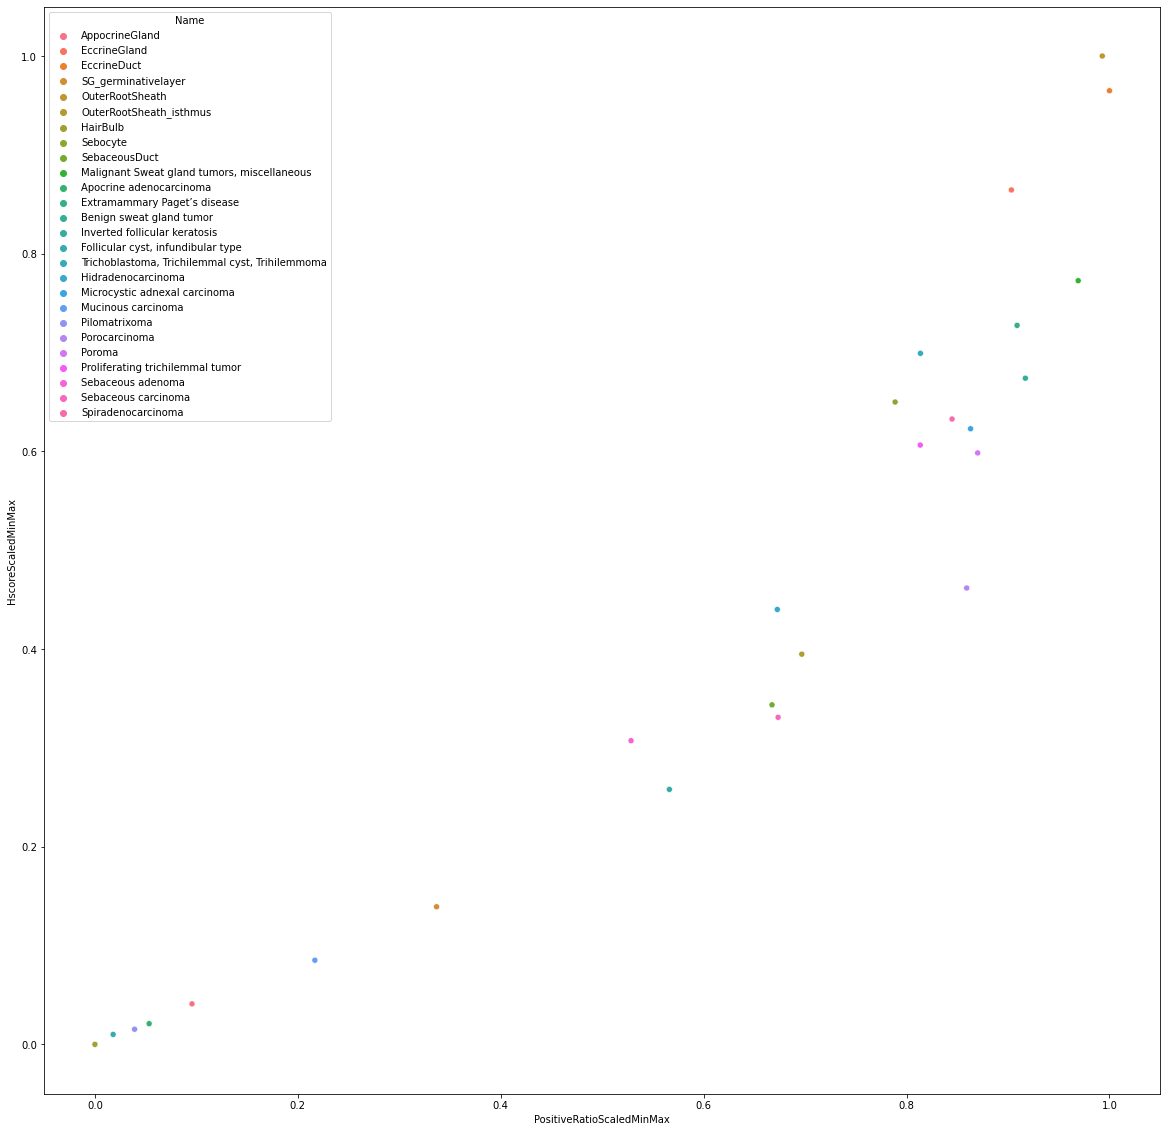

In [94]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=df_mean["PositiveRatioScaledMinMax"], y=df_mean["HscoreScaledMinMax"], hue=df_mean.index)

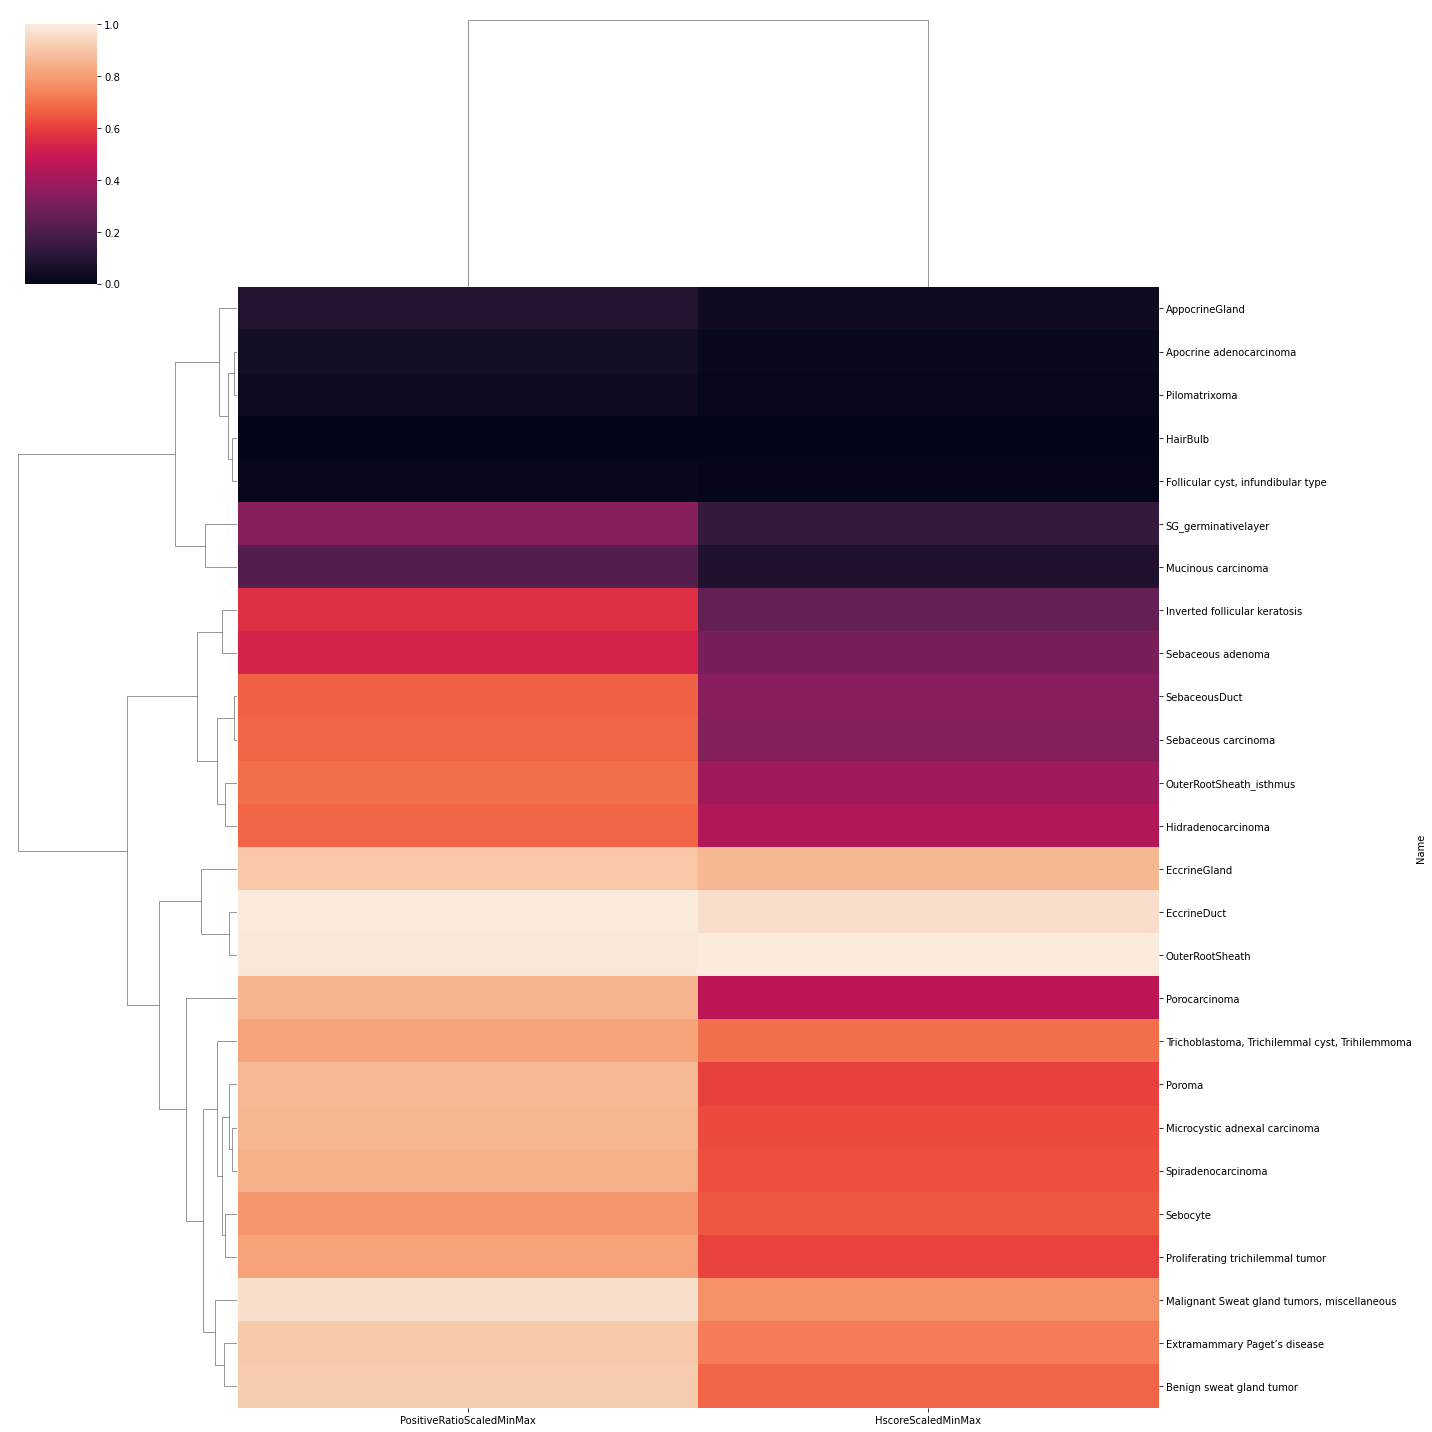

In [96]:
sns.clustermap(df_mean[["PositiveRatioScaledMinMax", "HscoreScaledMinMax"]], figsize=(20, 20))